In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1

In [16]:
x = np.array([[-2], [-1], [0], [2]])
y = np.array([2, 3, 1, -1])

num_examples, num_features = np.shape(x)

# Augment points with a dimension for the bias.
x = np.concatenate([np.ones((num_examples, 1)), x], axis=1)

print(x)
print(y)

[[ 1. -2.]
 [ 1. -1.]
 [ 1.  0.]
 [ 1.  2.]]
[ 2  3  1 -1]


[ 1.02857143 -0.88571429]
0.1428571428571428


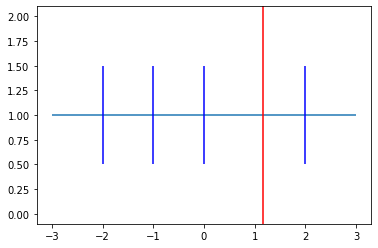

[ 0.8        -1.08571429  0.02857143  0.25714286]
4
0.4714285714285714


0.4714285714285714

In [28]:
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.transpose(x)), y)
print(w)

x_test=np.array([1,1])
y_pred=np.dot(x_test,w)
print(y_pred)

plt.figure()
x_n=x[:,1]
plt.hlines(1, min(x_n)-1,max(x_n)+1)
plt.eventplot(x_n, orientation='horizontal', colors='b')
plt.axvline(np.array([-w[0]/w[1]]), color='r')
plt.show()

# Mean squared error
error=x.dot(w)-y
print(error)
print(y.size)
ms_error=error.dot(error)/y.size
print(ms_error)
# Or
((x.dot(w)-y)**2).mean()


In [4]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

# Question 2

In [33]:
x = np.array([[1, 1], [2, 1], [1, 3], [3, 3]])
y = np.array([1.4, 0.5, 2, 2.5])

num_examples, num_features = np.shape(x)
print(np.shape(x))
print(x)

# Augment points with a dimension for the bias.
x = np.concatenate([np.ones((num_examples, 1)), x], axis=1)

print(x)
print(y)

(4, 2)
[[1 1]
 [2 1]
 [1 3]
 [3 3]]
[[1. 1. 1.]
 [1. 2. 1.]
 [1. 1. 3.]
 [1. 3. 3.]]
[1.4 0.5 2.  2.5]


In [35]:
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x),x)),np.transpose(x)), y)
print(w)

x_test=np.array([1,2,3])
y_pred=np.dot(x_test,w)
print(y_pred)

# Mean squared error
error=x.dot(w)-y
print(error)
print(y.size)
ms_error=error.dot(error)/y.size
print(ms_error)
# Or
((x.dot(w)-y)**2).mean()

[0.275 0.02  0.645]
2.2499999999999987
[-0.46  0.46  0.23 -0.23]
4
0.13224999999999998


0.13224999999999998

# Question 3

In [ ]:
# Same as before but first we need to transform x with a given transformation

# Question 4

In [57]:
x = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
y = np.array([0, 1, 1, 0])

num_examples, num_features = np.shape(x)
print(np.shape(x))
print(x)

# Augment points with a dimension for the bias.
x = np.concatenate([np.ones((num_examples, 1)), x], axis=1)

print(x)
print(y)

(4, 2)
[[-1.    0.  ]
 [ 0.    0.25]
 [ 1.    1.  ]
 [ 1.   -1.  ]]
[[ 1.   -1.    0.  ]
 [ 1.    0.    0.25]
 [ 1.    1.    1.  ]
 [ 1.    1.   -1.  ]]
[0 1 1 0]


In [58]:
def sigma(w, x):
    return 1/(1+np.exp(-w.dot(x.transpose())))

In [59]:
def GD(x,w,eta,N):
    for i in np.arange(N):
        y_pred=sigma(w,x)
        grad_L= x.transpose().dot(y_pred-y)
        eta=1
        w=w-eta*grad_L
        if i%5==0: print(w)
    return w

In [67]:
w = np.zeros(3)
eta=1
N=20000
w_new = GD(x,w,eta,N) 
print(w_new)

[0.    0.5   1.125]
[-0.11213246  1.21597914  3.0545761 ]
[0.00804116 1.66388565 4.02041042]
[0.11042225 2.01498386 4.73195671]
[0.1936514  2.30281606 5.30387612]
[0.26260663 2.54537076 5.78284129]
[0.3210557  2.75420518 6.19455776]
[0.3715906  2.93713098 6.5552135 ]
[0.41600187 3.09961994 6.87578164]
[0.45555748 3.24562569 7.16406791]
[0.49118021 3.37808385 7.42582522]
[0.52355902 3.49922671 7.6654133 ]
[0.55322021 3.61078733 7.88621243]
[0.58057393 3.71413576 8.09089433]
[0.60594552 3.81037243 8.28160575]
[0.62959708 3.90039366 8.46009645]
[0.65174263 3.98493864 8.62781063]
[0.67255911 4.06462374 8.78595361]
[0.69219436 4.13996804 8.93554134]
[0.71077313 4.21141259 9.07743783]
[0.72840161 4.27933517 9.21238374]
[0.7451709  4.34406175 9.3410187 ]
[0.76115971 4.40587548 9.4638987 ]
[0.77643654 4.46502381 9.58151   ]
[0.79106128 4.52172422 9.69428024]
[0.80508666 4.57616884 9.80258746]
[0.81855931 4.62852821 9.9067674 ]
[ 0.83152066  4.67895438 10.00711958]
[ 0.84400767  4.72758349 10.1

[0.    0.5   1.125]
